In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [2]:
prisma_angle = np.pi / 3

In [3]:
data = pd.read_csv("data_podgon.csv")
data

,wave_length,angle,minuets,seconds
0,690.72,51,40,808
1,576.96,52,10,746
2,579.07,52,10,700
3,546.07,52,40,219
4,491.60,53,30,21
5,453.83,54,50,37
6,404.66,55,50,901


In [4]:
angles_radians = np.pi * (data.angle + data.minuets / 60 + data.seconds / 3600) / 180 
n = np.sin((prisma_angle + angles_radians) / 2) / np.sin(prisma_angle / 2)

In [5]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1
 
    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0
 
    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
 
    def f(c):
        if c == 0:
            return 0
        else:
            return  intensity_max * pow (c * factor, gamma)
 
    return f(red), f(green), f(blue)

In [16]:
MNK = linregress(data.wave_length, n)

xAx = np.linspace(400, 700, 1000)
wave_colors = np.array([wave2rgb(x) for x in xAx])
best_line = MNK.slope * xAx + MNK.intercept
best_line_down = (MNK.slope + MNK.stderr) * xAx + MNK.intercept
best_line_up = (MNK.slope - MNK.stderr) * xAx + MNK.intercept 


partions_quantity = 100
xAx_partions = np.split(xAx, partions_quantity)
best_line_partions = np.split(best_line, partions_quantity)
wave_colors_split = np.split(wave_colors, partions_quantity)
best_line_down_split = np.split(best_line_down, partions_quantity)
best_line_up_split = np.split(best_line_up, partions_quantity)

print(MNK.slope)
print(MNK.intercept_stderr)
print(MNK.intercept_stderr)
print(MNK.intercept)

-0.000142913096589775
0.01430429641846614
0.01430429641846614
1.7478832875201065


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


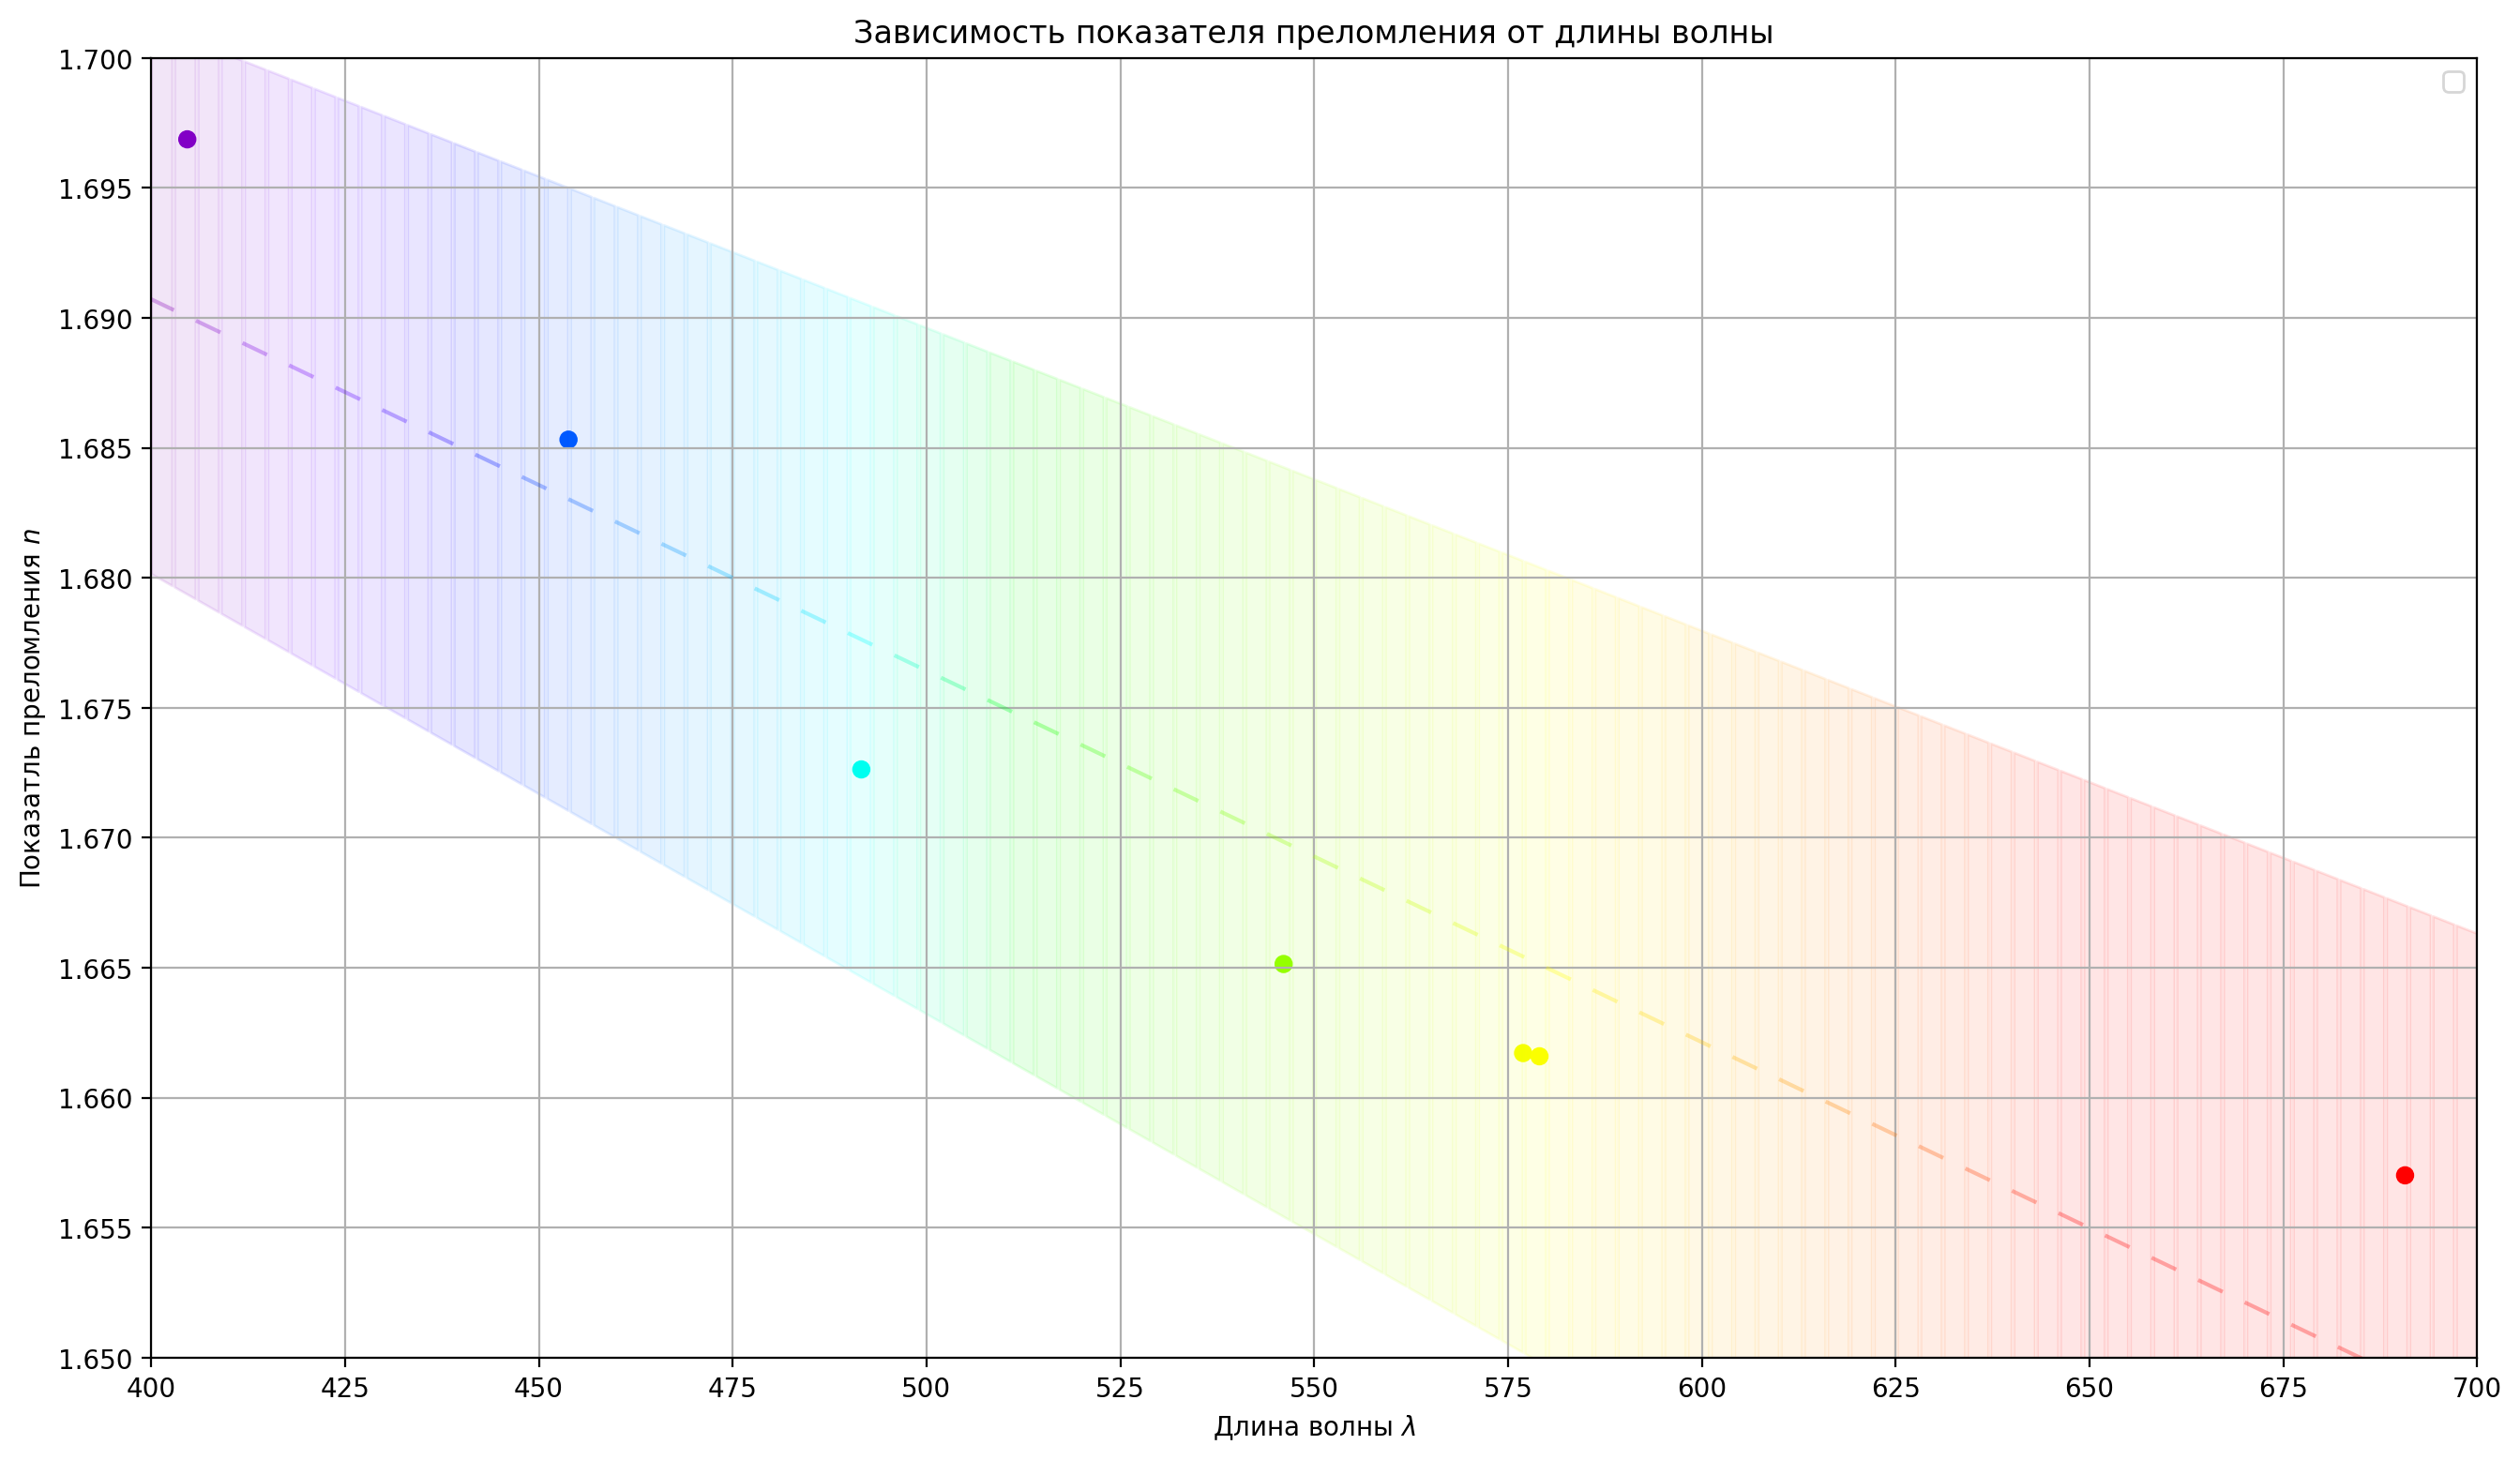

In [17]:
plt.figure(figsize = (16, 9), dpi = 200)

# plt.scatter(data.wave_length, 
#              n, 
#              c = ['purple', 'blue', 'deepskyblue', 'green', 'yellow', 'yellow', 'red'][::-1])

plt.scatter(data.wave_length, 
             n, 
             c = [wave2rgb(length) for length in data.wave_length])

for xAx_partion, best_line_partion, color in zip(xAx_partions[::2], best_line_partions[::2], wave_colors_split[::2]):
    plt.plot(xAx_partion, best_line_partion, c = color[0], alpha = 0.3)
    
for xAx_partion, line_down, line_up, color in zip(xAx_partions, best_line_down_split, best_line_up_split, wave_colors_split):
    plt.fill_between(xAx_partion, 
                     line_down,
                     line_up,
                     color = color[0],
                     alpha = 0.1)

# plt.fill_between(xAx, best_line_down, best_line_up)

plt.xlim(400, 700)
plt.ylim(1.65, 1.7)
plt.xticks(np.arange(400, 725, 25))
plt.yticks(np.arange(1.65, 1.7, 0.005))
plt.title("Зависимость показателя преломления от длины волны")
plt.legend()
plt.xlabel("Длина волны $\lambda$")
plt.ylabel("Показатль преломления $n$")
plt.grid()
plt.savefig("n_by_lambda.png")

In [8]:
print(xAx.shape)
print(best_line_down.shape)

(1000,)
(1000,)
